In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pandas.io.sql as psql
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option("display.max_rows", 999)

In [24]:
import sqlite3
conn = sqlite3.connect('social.db')


In [25]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix


#classifier = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)


In [26]:
from skmultiflow.drift_detection.eddm import EDDM
from skmultiflow.drift_detection.adwin import ADWIN
from skmultiflow.drift_detection import DDM

### SQL usada para extrair os dados

In [27]:
sql="SELECT user,weekend,dayWeek,day,month,slot,conversation  from social where user={}"

## Obtem todas as informações de conversação de todos os usuarios

In [28]:
sql="SELECT user,weekend,dayWeek,day,month,slot,conversation  from social"
dataTrain=pd.read_sql_query(sql, conn, chunksize=5)


In [29]:
print(dataTrain)

<generator object SQLiteDatabase._query_iterator at 0x7fb142cda228>


## extrai e transforma os dados

In [18]:
X = dataTrain.drop('conversation', axis=1).drop('user', axis=1)
y = dataTrain['conversation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

AttributeError: 'generator' object has no attribute 'drop'

## treina o SVN com os dados de todos os usuarios

In [ ]:

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Verifica a precisão do modelo
## Accuracy
Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.
#### Accuracy = (TP+TN) / (TP+FP+FN+TN)
## Precision
Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 
#### Precision = TP / (TP+FP)
## Recall
Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. 
#### Recall = TP / (TP+FN)
## F1 Score
F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
#### F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print("----------")
report=classification_report(y_test,y_pred, output_dict=True)
print(report)
print(report['accuracy'])

### Verifica a taxa de acertos no modelo baseado nos dados de todos os usuários

In [ ]:
dic = {}
for i in range(0,60):
    dataTrain=pd.read_sql_query(sql.format(i), conn)
    if len(dataTrain)<10 :
        continue
        
    X = dataTrain.drop('conversation', axis=1).drop('user', axis=1)
    y = dataTrain['conversation']
    
    y_pred = classifier.predict(x)
    report=classification_report(y,y_pred, output_dict=True)
    print(i,report['accuracy'])
 
    dic.update( {i:{ 'user' : i, 'accuracy':report['accuracy'] ,'report':report} })
    

In [179]:
df_train = pd.DataFrame.from_dict(dic, orient='index')
# df_train.sort_values(by=['accuracy'])


,user,accuracy,report
31,31,0.588981,"{'0': {'precision': 0.6149068322981367, 'recal..."
12,12,0.630721,"{'0': {'precision': 0.7094594594594594, 'recal..."
10,10,0.657549,"{'0': {'precision': 0.7221727515583259, 'recal..."
2,2,0.668269,"{'0': {'precision': 0.6682692307692307, 'recal..."
19,19,0.669323,"{'0': {'precision': 0.7319932998324958, 'recal..."
49,49,0.671205,"{'0': {'precision': 0.7620111731843575, 'recal..."
54,54,0.672083,"{'0': {'precision': 0.672082717872969, 'recall..."
5,5,0.672993,"{'0': {'precision': 0.6729934924078091, 'recal..."
0,0,0.674078,"{'0': {'precision': 0.7133550488599348, 'recal..."
53,53,0.678416,"{'0': {'precision': 0.678416485900217, 'recall..."


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

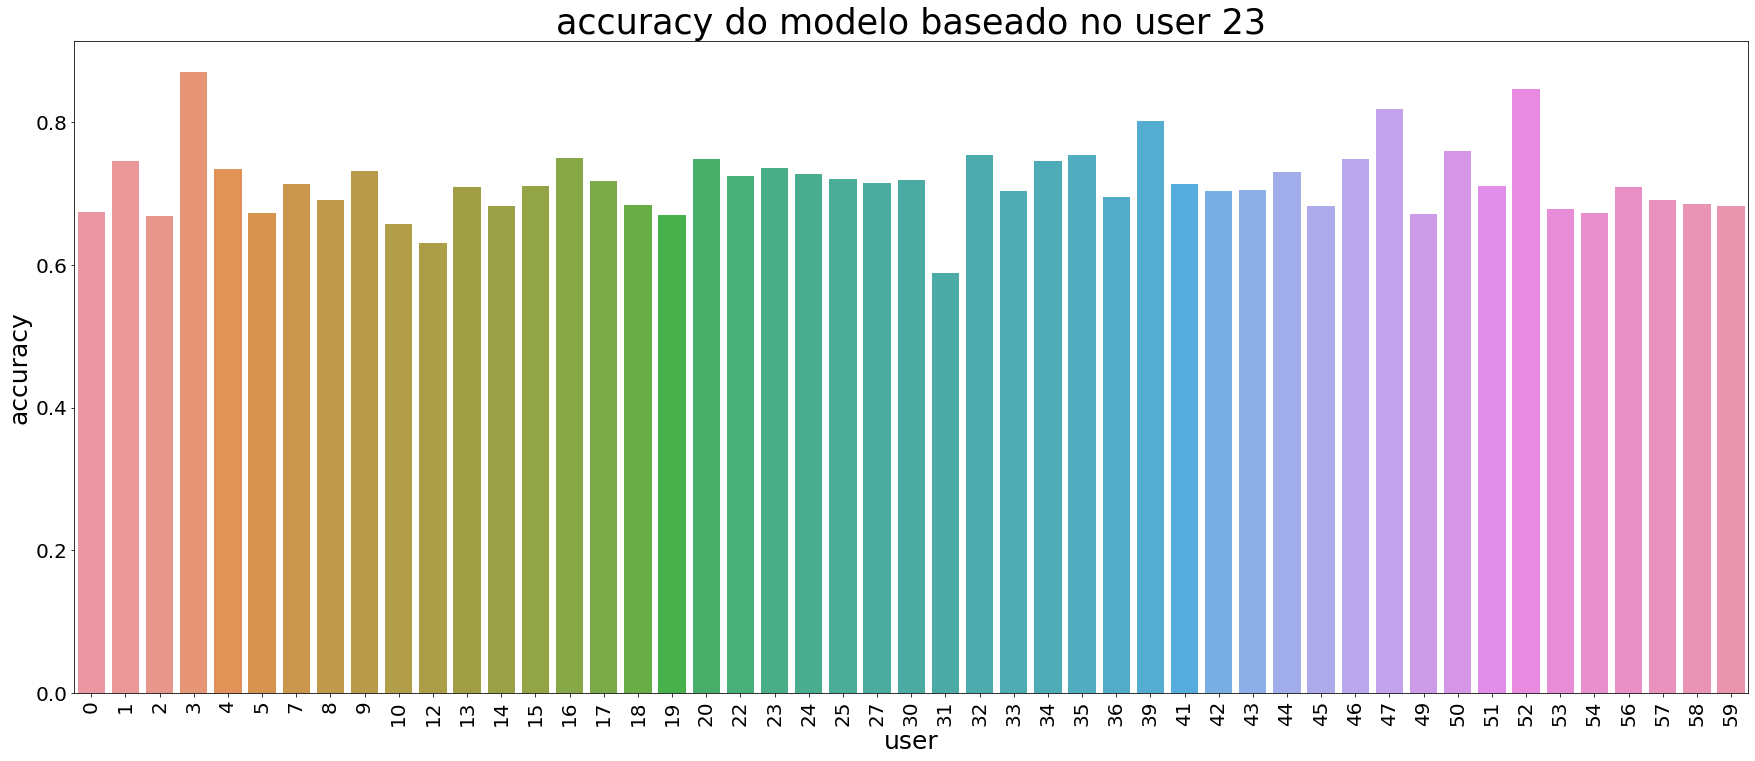

In [180]:
f, ax = plt.subplots(figsize=(30, 12))
plt.xticks(rotation='90')
sns.barplot(x=df_train['user'], y=df_train['accuracy'])
plt.xlabel('user', fontsize=25)
plt.ylabel('accuracy', fontsize=25)
plt.title('accuracy do modelo baseado no user 23', fontsize=35)
plt.xticks(rotation='90',fontsize=20)
plt.yticks(fontsize=20)

In [181]:
for index, row in dataTrain.iterrows():
    d=[row['weekend'],row['dayWeek'],row['day'],row['month'],row['slot']]  
    check=classifier.predict([d])[0]==row['conversation']
    print(d,check)

[0, 3, 27, 3, 0] False
[0, 3, 27, 3, 1] False
[0, 3, 27, 3, 2] True
[0, 3, 27, 3, 3] True
[0, 3, 27, 3, 4] True
[0, 3, 27, 3, 5] True
[0, 3, 27, 3, 6] True
[0, 3, 27, 3, 7] True
[0, 3, 27, 3, 8] True
[0, 3, 27, 3, 9] True
[0, 3, 27, 3, 10] True
[0, 3, 27, 3, 11] True
[0, 3, 27, 3, 12] True
[0, 3, 27, 3, 13] True
[0, 3, 27, 3, 14] True
[0, 3, 27, 3, 15] True
[0, 3, 27, 3, 16] True
[0, 3, 27, 3, 17] True
[0, 3, 27, 3, 18] True
[0, 3, 27, 3, 19] True
[0, 3, 27, 3, 20] True
[0, 3, 27, 3, 21] True
[0, 3, 27, 3, 22] True
[0, 3, 27, 3, 23] True
[0, 3, 27, 3, 24] True
[0, 3, 27, 3, 25] True
[0, 3, 27, 3, 26] True
[0, 3, 27, 3, 27] True
[0, 3, 27, 3, 28] True
[0, 3, 27, 3, 29] True
[0, 3, 27, 3, 30] True
[0, 3, 27, 3, 31] True
[0, 3, 27, 3, 32] True
[0, 3, 27, 3, 33] True
[0, 3, 27, 3, 34] True
[0, 3, 27, 3, 35] True
[0, 3, 27, 3, 36] True
[0, 3, 27, 3, 37] True
[0, 3, 27, 3, 38] True
[0, 3, 27, 3, 39] True
[0, 3, 27, 3, 40] True
[0, 3, 27, 3, 41] True
[0, 3, 27, 3, 42] False
[0, 3, 27, 3, 43] 

[1, 0, 31, 3, 44] True
[1, 0, 31, 3, 45] True
[1, 0, 31, 3, 46] True
[1, 0, 31, 3, 47] True
[1, 0, 31, 3, 48] True
[1, 0, 31, 3, 49] True
[1, 0, 31, 3, 50] True
[1, 0, 31, 3, 51] True
[1, 0, 31, 3, 52] False
[1, 0, 31, 3, 53] True
[1, 0, 31, 3, 54] False
[1, 0, 31, 3, 55] True
[1, 0, 31, 3, 56] False
[1, 0, 31, 3, 57] True
[1, 0, 31, 3, 58] True
[1, 0, 31, 3, 59] False
[1, 0, 31, 3, 60] False
[1, 0, 31, 3, 61] True
[1, 0, 31, 3, 62] True
[1, 0, 31, 3, 63] True
[1, 0, 31, 3, 64] True
[1, 0, 31, 3, 65] True
[1, 0, 31, 3, 66] False
[1, 0, 31, 3, 67] False
[1, 0, 31, 3, 68] False
[1, 0, 31, 3, 69] False
[1, 0, 31, 3, 70] False
[1, 0, 31, 3, 71] False
[1, 0, 31, 3, 72] False
[1, 0, 31, 3, 73] False
[1, 0, 31, 3, 74] True
[1, 0, 31, 3, 75] True
[1, 0, 31, 3, 76] True
[1, 0, 31, 3, 77] True
[1, 0, 31, 3, 78] True
[1, 0, 31, 3, 79] True
[1, 0, 31, 3, 80] True
[1, 0, 31, 3, 81] True
[1, 0, 31, 3, 82] True
[1, 0, 31, 3, 83] True
[1, 0, 31, 3, 84] False
[1, 0, 31, 3, 85] False
[1, 0, 31, 3, 86] F

[0, 4, 4, 4, 81] False
[0, 4, 4, 4, 82] True
[0, 4, 4, 4, 83] False
[0, 4, 4, 4, 84] True
[0, 4, 4, 4, 85] True
[0, 4, 4, 4, 86] True
[0, 4, 4, 4, 87] True
[0, 4, 4, 4, 88] True
[0, 4, 4, 4, 89] False
[0, 4, 4, 4, 90] True
[0, 4, 4, 4, 91] True
[0, 4, 4, 4, 92] True
[0, 4, 4, 4, 93] True
[0, 4, 4, 4, 94] True
[0, 4, 4, 4, 95] True
[0, 5, 5, 4, 0] False
[0, 5, 5, 4, 1] False
[0, 5, 5, 4, 2] False
[0, 5, 5, 4, 3] False
[0, 5, 5, 4, 4] False
[0, 5, 5, 4, 5] False
[0, 5, 5, 4, 6] False
[0, 5, 5, 4, 7] True
[0, 5, 5, 4, 8] False
[0, 5, 5, 4, 9] True
[0, 5, 5, 4, 10] True
[0, 5, 5, 4, 11] True
[0, 5, 5, 4, 12] True
[0, 5, 5, 4, 13] True
[0, 5, 5, 4, 14] True
[0, 5, 5, 4, 15] True
[0, 5, 5, 4, 16] True
[0, 5, 5, 4, 17] True
[0, 5, 5, 4, 18] True
[0, 5, 5, 4, 19] True
[0, 5, 5, 4, 20] True
[0, 5, 5, 4, 21] True
[0, 5, 5, 4, 22] True
[0, 5, 5, 4, 23] True
[0, 5, 5, 4, 24] True
[0, 5, 5, 4, 25] True
[0, 5, 5, 4, 26] True
[0, 5, 5, 4, 27] True
[0, 5, 5, 4, 28] True
[0, 5, 5, 4, 29] True
[0, 5, 5,

[0, 2, 9, 4, 31] True
[0, 2, 9, 4, 32] False
[0, 2, 9, 4, 33] False
[0, 2, 9, 4, 34] False
[0, 2, 9, 4, 35] False
[0, 2, 9, 4, 36] False
[0, 2, 9, 4, 37] False
[0, 2, 9, 4, 38] False
[0, 2, 9, 4, 39] False
[0, 2, 9, 4, 40] True
[0, 2, 9, 4, 41] True
[0, 2, 9, 4, 42] True
[0, 2, 9, 4, 43] False
[0, 2, 9, 4, 44] False
[0, 2, 9, 4, 45] False
[0, 2, 9, 4, 46] True
[0, 2, 9, 4, 47] True
[0, 2, 9, 4, 48] True
[0, 2, 9, 4, 49] False
[0, 2, 9, 4, 50] False
[0, 2, 9, 4, 51] False
[0, 2, 9, 4, 52] False
[0, 2, 9, 4, 53] True
[0, 2, 9, 4, 54] True
[0, 2, 9, 4, 55] True
[0, 2, 9, 4, 56] True
[0, 2, 9, 4, 57] True
[0, 2, 9, 4, 58] True
[0, 2, 9, 4, 59] True
[0, 2, 9, 4, 60] True
[0, 2, 9, 4, 61] True
[0, 2, 9, 4, 62] True
[0, 2, 9, 4, 63] True
[0, 2, 9, 4, 64] True
[0, 2, 9, 4, 65] True
[0, 2, 9, 4, 66] True
[0, 2, 9, 4, 67] True
[0, 2, 9, 4, 68] True
[0, 2, 9, 4, 69] True
[0, 2, 9, 4, 70] False
[0, 2, 9, 4, 71] True
[0, 2, 9, 4, 72] False
[0, 2, 9, 4, 73] False
[0, 2, 9, 4, 74] False
[0, 2, 9, 4, 

[0, 5, 13, 4, 72] True
[0, 5, 13, 4, 73] False
[0, 5, 13, 4, 74] True
[0, 5, 13, 4, 75] True
[0, 5, 13, 4, 76] True
[0, 5, 13, 4, 77] True
[0, 5, 13, 4, 78] False
[0, 5, 13, 4, 79] False
[0, 5, 13, 4, 80] False
[0, 5, 13, 4, 81] False
[0, 5, 13, 4, 82] False
[0, 5, 13, 4, 83] False
[0, 5, 13, 4, 84] True
[0, 5, 13, 4, 85] True
[0, 5, 13, 4, 86] True
[0, 5, 13, 4, 87] True
[0, 5, 13, 4, 88] True
[0, 5, 13, 4, 89] True
[0, 5, 13, 4, 90] True
[0, 5, 13, 4, 91] True
[0, 5, 13, 4, 92] True
[0, 5, 13, 4, 93] False
[0, 5, 13, 4, 94] True
[0, 5, 13, 4, 95] True
[1, 6, 14, 4, 0] True
[1, 6, 14, 4, 1] False
[1, 6, 14, 4, 2] False
[1, 6, 14, 4, 3] False
[1, 6, 14, 4, 4] False
[1, 6, 14, 4, 5] False
[1, 6, 14, 4, 6] False
[1, 6, 14, 4, 7] False
[1, 6, 14, 4, 8] False
[1, 6, 14, 4, 9] False
[1, 6, 14, 4, 10] False
[1, 6, 14, 4, 11] False
[1, 6, 14, 4, 12] False
[1, 6, 14, 4, 13] False
[1, 6, 14, 4, 14] False
[1, 6, 14, 4, 15] False
[1, 6, 14, 4, 16] True
[1, 6, 14, 4, 17] False
[1, 6, 14, 4, 18] Fa

[0, 3, 18, 4, 28] True
[0, 3, 18, 4, 29] True
[0, 3, 18, 4, 30] True
[0, 3, 18, 4, 31] True
[0, 3, 18, 4, 32] False
[0, 3, 18, 4, 33] False
[0, 3, 18, 4, 34] False
[0, 3, 18, 4, 35] False
[0, 3, 18, 4, 36] False
[0, 3, 18, 4, 37] False
[0, 3, 18, 4, 38] False
[0, 3, 18, 4, 39] False
[0, 3, 18, 4, 40] False
[0, 3, 18, 4, 41] False
[0, 3, 18, 4, 42] False
[0, 3, 18, 4, 43] True
[0, 3, 18, 4, 44] False
[0, 3, 18, 4, 45] False
[0, 3, 18, 4, 46] True
[0, 3, 18, 4, 47] True
[0, 3, 18, 4, 48] True
[0, 3, 18, 4, 49] True
[0, 3, 18, 4, 50] True
[0, 3, 18, 4, 51] True
[0, 3, 18, 4, 52] False
[0, 3, 18, 4, 53] False
[0, 3, 18, 4, 54] False
[0, 3, 18, 4, 55] False
[0, 3, 18, 4, 56] False
[0, 3, 18, 4, 57] False
[0, 3, 18, 4, 58] False
[0, 3, 18, 4, 59] True
[0, 3, 18, 4, 60] False
[0, 3, 18, 4, 61] False
[0, 3, 18, 4, 62] False
[0, 3, 18, 4, 63] False
[0, 3, 18, 4, 64] False
[0, 3, 18, 4, 65] False
[0, 3, 18, 4, 66] False
[0, 3, 18, 4, 67] True
[0, 3, 18, 4, 68] True
[0, 3, 18, 4, 69] True
[0, 3, 

[0, 1, 22, 4, 45] True
[0, 1, 22, 4, 46] True
[0, 1, 22, 4, 47] False
[0, 1, 22, 4, 48] False
[0, 1, 22, 4, 49] True
[0, 1, 22, 4, 50] True
[0, 1, 22, 4, 51] False
[0, 1, 22, 4, 52] True
[0, 1, 22, 4, 53] False
[0, 1, 22, 4, 54] True
[0, 1, 22, 4, 55] True
[0, 1, 22, 4, 56] True
[0, 1, 22, 4, 57] True
[0, 1, 22, 4, 58] True
[0, 1, 22, 4, 59] True
[0, 1, 22, 4, 60] True
[0, 1, 22, 4, 61] True
[0, 1, 22, 4, 62] True
[0, 1, 22, 4, 63] True
[0, 1, 22, 4, 64] True
[0, 1, 22, 4, 65] True
[0, 1, 22, 4, 66] True
[0, 1, 22, 4, 67] True
[0, 1, 22, 4, 68] True
[0, 1, 22, 4, 69] False
[0, 1, 22, 4, 70] False
[0, 1, 22, 4, 71] False
[0, 1, 22, 4, 72] True
[0, 1, 22, 4, 73] False
[0, 1, 22, 4, 74] True
[0, 1, 22, 4, 75] True
[0, 1, 22, 4, 76] False
[0, 1, 22, 4, 77] False
[0, 1, 22, 4, 78] False
[0, 1, 22, 4, 79] True
[0, 1, 22, 4, 80] True
[0, 1, 22, 4, 81] True
[0, 1, 22, 4, 82] True
[0, 1, 22, 4, 83] True
[0, 1, 22, 4, 84] True
[0, 1, 22, 4, 85] True
[0, 1, 22, 4, 86] True
[0, 1, 22, 4, 87] True


[1, 6, 27, 4, 26] True
[1, 6, 27, 4, 27] True
[1, 6, 27, 4, 28] True
[1, 6, 27, 4, 29] True
[1, 6, 27, 4, 30] True
[1, 6, 27, 4, 31] True
[1, 6, 27, 4, 32] True
[1, 6, 27, 4, 33] True
[1, 6, 27, 4, 34] True
[1, 6, 27, 4, 35] True
[1, 6, 27, 4, 36] True
[1, 6, 27, 4, 37] True
[1, 6, 27, 4, 38] True
[1, 6, 27, 4, 39] True
[1, 6, 27, 4, 40] True
[1, 6, 27, 4, 41] True
[1, 6, 27, 4, 42] True
[1, 6, 27, 4, 43] True
[1, 6, 27, 4, 44] False
[1, 6, 27, 4, 45] True
[1, 6, 27, 4, 46] True
[1, 6, 27, 4, 47] True
[1, 6, 27, 4, 48] True
[1, 6, 27, 4, 49] True
[1, 6, 27, 4, 50] True
[1, 6, 27, 4, 51] True
[1, 6, 27, 4, 52] False
[1, 6, 27, 4, 53] False
[1, 6, 27, 4, 54] False
[1, 6, 27, 4, 55] True
[1, 6, 27, 4, 56] False
[1, 6, 27, 4, 57] True
[1, 6, 27, 4, 58] False
[1, 6, 27, 4, 59] False
[1, 6, 27, 4, 60] False
[1, 6, 27, 4, 61] False
[1, 6, 27, 4, 62] True
[1, 6, 27, 4, 63] True
[1, 6, 27, 4, 64] False
[1, 6, 27, 4, 65] True
[1, 6, 27, 4, 66] False
[1, 6, 27, 4, 67] True
[1, 6, 27, 4, 68] False

[0, 3, 1, 5, 74] True
[0, 3, 1, 5, 75] True
[0, 3, 1, 5, 76] True
[0, 3, 1, 5, 77] False
[0, 3, 1, 5, 78] False
[0, 3, 1, 5, 79] False
[0, 3, 1, 5, 80] True
[0, 3, 1, 5, 81] True
[0, 3, 1, 5, 82] True
[0, 3, 1, 5, 83] True
[0, 3, 1, 5, 84] True
[0, 3, 1, 5, 85] True
[0, 3, 1, 5, 86] True
[0, 3, 1, 5, 87] True
[0, 3, 1, 5, 88] True
[0, 3, 1, 5, 89] True
[0, 3, 1, 5, 90] True
[0, 3, 1, 5, 91] False
[0, 3, 1, 5, 92] False
[0, 3, 1, 5, 93] False
[0, 3, 1, 5, 94] False
[0, 3, 1, 5, 95] False
[0, 3, 2, 5, 0] True
[0, 3, 2, 5, 1] False
[0, 3, 2, 5, 2] True
[0, 3, 2, 5, 3] True
[0, 3, 2, 5, 4] True
[0, 3, 2, 5, 5] False
[0, 3, 2, 5, 6] False
[0, 3, 2, 5, 7] False
[0, 3, 2, 5, 8] False
[0, 3, 2, 5, 9] False
[0, 3, 2, 5, 10] False
[0, 3, 2, 5, 11] False
[0, 3, 2, 5, 12] False
[0, 3, 2, 5, 13] False
[0, 3, 2, 5, 14] False
[0, 3, 2, 5, 15] False
[0, 3, 2, 5, 16] False
[0, 3, 2, 5, 17] False
[0, 3, 2, 5, 18] False
[0, 3, 2, 5, 19] False
[0, 3, 2, 5, 20] False
[0, 3, 2, 5, 21] False
[0, 3, 2, 5, 22]

[0, 1, 6, 5, 16] True
[0, 1, 6, 5, 17] True
[0, 1, 6, 5, 18] True
[0, 1, 6, 5, 19] True
[0, 1, 6, 5, 20] True
[0, 1, 6, 5, 21] True
[0, 1, 6, 5, 22] True
[0, 1, 6, 5, 23] True
[0, 1, 6, 5, 24] True
[0, 1, 6, 5, 25] True
[0, 1, 6, 5, 26] False
[0, 1, 6, 5, 27] True
[0, 1, 6, 5, 28] True
[0, 1, 6, 5, 29] True
[0, 1, 6, 5, 30] True
[0, 1, 6, 5, 31] True
[0, 1, 6, 5, 32] False
[0, 1, 6, 5, 33] False
[0, 1, 6, 5, 34] False
[0, 1, 6, 5, 35] False
[0, 1, 6, 5, 36] False
[0, 1, 6, 5, 37] False
[0, 1, 6, 5, 38] False
[0, 1, 6, 5, 39] False
[0, 1, 6, 5, 40] True
[0, 1, 6, 5, 41] True
[0, 1, 6, 5, 42] True
[0, 1, 6, 5, 43] True
[0, 1, 6, 5, 44] False
[0, 1, 6, 5, 45] True
[0, 1, 6, 5, 46] False
[0, 1, 6, 5, 47] True
[0, 1, 6, 5, 48] False
[0, 1, 6, 5, 49] True
[0, 1, 6, 5, 50] True
[0, 1, 6, 5, 51] True
[0, 1, 6, 5, 52] True
[0, 1, 6, 5, 53] True
[0, 1, 6, 5, 54] False
[0, 1, 6, 5, 55] False
[0, 1, 6, 5, 56] False
[0, 1, 6, 5, 57] True
[0, 1, 6, 5, 58] True
[0, 1, 6, 5, 59] True
[0, 1, 6, 5, 60] 

[0, 4, 10, 5, 64] True
[0, 4, 10, 5, 65] True
[0, 4, 10, 5, 66] False
[0, 4, 10, 5, 67] False
[0, 4, 10, 5, 68] False
[0, 4, 10, 5, 69] False
[0, 4, 10, 5, 70] False
[0, 4, 10, 5, 71] False
[0, 4, 10, 5, 72] False
[0, 4, 10, 5, 73] False
[0, 4, 10, 5, 74] False
[0, 4, 10, 5, 75] False
[0, 4, 10, 5, 76] False
[0, 4, 10, 5, 77] False
[0, 4, 10, 5, 78] False
[0, 4, 10, 5, 79] False
[0, 4, 10, 5, 80] False
[0, 4, 10, 5, 81] False
[0, 4, 10, 5, 82] False
[0, 4, 10, 5, 83] False
[0, 4, 10, 5, 84] False
[0, 4, 10, 5, 85] False
[0, 4, 10, 5, 86] False
[0, 4, 10, 5, 87] False
[0, 4, 10, 5, 88] False
[0, 4, 10, 5, 89] False
[0, 4, 10, 5, 90] False
[0, 4, 10, 5, 91] False
[0, 4, 10, 5, 92] False
[0, 4, 10, 5, 93] False
[0, 4, 10, 5, 94] False
[0, 4, 10, 5, 95] False
[1, 6, 11, 5, 0] True
[1, 6, 11, 5, 1] True
[1, 6, 11, 5, 2] True
[1, 6, 11, 5, 3] True
[1, 6, 11, 5, 4] True
[1, 6, 11, 5, 5] True
[1, 6, 11, 5, 6] True
[1, 6, 11, 5, 7] True
[1, 6, 11, 5, 8] True
[1, 6, 11, 5, 9] True
[1, 6, 11, 5, 

[0, 3, 15, 5, 48] False
[0, 3, 15, 5, 49] True
[0, 3, 15, 5, 50] True
[0, 3, 15, 5, 51] False
[0, 3, 15, 5, 52] False
[0, 3, 15, 5, 53] False
[0, 3, 15, 5, 54] True
[0, 3, 15, 5, 55] True
[0, 3, 15, 5, 56] True
[0, 3, 15, 5, 57] True
[0, 3, 15, 5, 58] True
[0, 3, 15, 5, 59] True
[0, 3, 15, 5, 60] True
[0, 3, 15, 5, 61] True
[0, 3, 15, 5, 62] True
[0, 3, 15, 5, 63] True
[0, 3, 15, 5, 64] True
[0, 3, 15, 5, 65] False
[0, 3, 15, 5, 66] True
[0, 3, 15, 5, 67] True
[0, 3, 15, 5, 68] True
[0, 3, 15, 5, 69] True
[0, 3, 15, 5, 70] True
[0, 3, 15, 5, 71] True
[0, 3, 15, 5, 72] True
[0, 3, 15, 5, 73] True
[0, 3, 15, 5, 74] True
[0, 3, 15, 5, 75] True
[0, 3, 15, 5, 76] True
[0, 3, 15, 5, 77] True
[0, 3, 15, 5, 78] True
[0, 3, 15, 5, 79] True
[0, 3, 15, 5, 80] True
[0, 3, 15, 5, 81] True
[0, 3, 15, 5, 82] True
[0, 3, 15, 5, 83] True
[0, 3, 15, 5, 84] False
[0, 3, 15, 5, 85] False
[0, 3, 15, 5, 86] False
[0, 3, 15, 5, 87] False
[0, 3, 15, 5, 88] True
[0, 3, 15, 5, 89] True
[0, 3, 15, 5, 90] True
[0

[0, 1, 20, 5, 31] True
[0, 1, 20, 5, 32] False
[0, 1, 20, 5, 33] False
[0, 1, 20, 5, 34] False
[0, 1, 20, 5, 35] False
[0, 1, 20, 5, 36] False
[0, 1, 20, 5, 37] False
[0, 1, 20, 5, 38] False
[0, 1, 20, 5, 39] False
[0, 1, 20, 5, 40] False
[0, 1, 20, 5, 41] False
[0, 1, 20, 5, 42] True
[0, 1, 20, 5, 43] True
[0, 1, 20, 5, 44] True
[0, 1, 20, 5, 45] False
[0, 1, 20, 5, 46] True
[0, 1, 20, 5, 47] True
[0, 1, 20, 5, 48] False
[0, 1, 20, 5, 49] False
[0, 1, 20, 5, 50] False
[0, 1, 20, 5, 51] False
[0, 1, 20, 5, 52] False
[0, 1, 20, 5, 53] False
[0, 1, 20, 5, 54] False
[0, 1, 20, 5, 55] True
[0, 1, 20, 5, 56] True
[0, 1, 20, 5, 57] True
[0, 1, 20, 5, 58] True
[0, 1, 20, 5, 59] True
[0, 1, 20, 5, 60] True
[0, 1, 20, 5, 61] True
[0, 1, 20, 5, 62] True
[0, 1, 20, 5, 63] True
[0, 1, 20, 5, 64] False
[0, 1, 20, 5, 65] False
[0, 1, 20, 5, 66] True
[0, 1, 20, 5, 67] True
[0, 1, 20, 5, 68] True
[0, 1, 20, 5, 69] True
[0, 1, 20, 5, 70] True
[0, 1, 20, 5, 71] True
[0, 1, 20, 5, 72] True
[0, 1, 20, 5, 

[0, 4, 24, 5, 67] False
[0, 4, 24, 5, 68] True
[0, 4, 24, 5, 69] True
[0, 4, 24, 5, 70] True
[0, 4, 24, 5, 71] True
[0, 4, 24, 5, 72] True
[0, 4, 24, 5, 73] True
[0, 4, 24, 5, 74] False
[0, 4, 24, 5, 75] False
[0, 4, 24, 5, 76] False
[0, 4, 24, 5, 77] True
[0, 4, 24, 5, 78] True
[0, 4, 24, 5, 79] True
[0, 4, 24, 5, 80] True
[0, 4, 24, 5, 81] True
[0, 4, 24, 5, 82] True
[0, 4, 24, 5, 83] True
[0, 4, 24, 5, 84] True
[0, 4, 24, 5, 85] True
[0, 4, 24, 5, 86] True
[0, 4, 24, 5, 87] True
[0, 4, 24, 5, 88] True
[0, 4, 24, 5, 89] True
[0, 4, 24, 5, 90] True
[0, 4, 24, 5, 91] True
[0, 4, 24, 5, 92] True
[0, 4, 24, 5, 93] True
[0, 4, 24, 5, 94] True
[0, 4, 24, 5, 95] False
[1, 6, 25, 5, 0] False
[1, 6, 25, 5, 1] False
[1, 6, 25, 5, 2] True
[1, 6, 25, 5, 3] True
[1, 6, 25, 5, 4] False
[1, 6, 25, 5, 5] True
[1, 6, 25, 5, 6] False
[1, 6, 25, 5, 7] False
[1, 6, 25, 5, 8] True
[1, 6, 25, 5, 9] True
[1, 6, 25, 5, 10] True
[1, 6, 25, 5, 11] True
[1, 6, 25, 5, 12] True
[1, 6, 25, 5, 13] True
[1, 6, 25, 

[0, 1, 28, 5, 89] True
[0, 1, 28, 5, 90] True
[0, 1, 28, 5, 91] True
[0, 1, 28, 5, 92] True
[0, 1, 28, 5, 93] True
[0, 1, 28, 5, 94] True
[0, 1, 28, 5, 95] True
[0, 2, 29, 5, 0] True
[0, 2, 29, 5, 1] False
[0, 2, 29, 5, 2] False
[0, 2, 29, 5, 3] False
[0, 2, 29, 5, 4] False
[0, 2, 29, 5, 5] False
[0, 2, 29, 5, 6] False
[0, 2, 29, 5, 7] False
[0, 2, 29, 5, 8] False
[0, 2, 29, 5, 9] False
[0, 2, 29, 5, 10] False
[0, 2, 29, 5, 11] False
[0, 2, 29, 5, 12] False
[0, 2, 29, 5, 13] False
[0, 2, 29, 5, 14] False
[0, 2, 29, 5, 15] False
[0, 2, 29, 5, 16] False
[0, 2, 29, 5, 17] True
[0, 2, 29, 5, 18] True
[0, 2, 29, 5, 19] True
[0, 2, 29, 5, 20] True
[0, 2, 29, 5, 21] True
[0, 2, 29, 5, 22] True
[0, 2, 29, 5, 23] True
[0, 2, 29, 5, 24] True
[0, 2, 29, 5, 25] True
[0, 2, 29, 5, 26] True
[0, 2, 29, 5, 27] True
[0, 2, 29, 5, 28] False
[0, 2, 29, 5, 29] True
[0, 2, 29, 5, 30] True
[0, 2, 29, 5, 31] False
[0, 2, 29, 5, 32] False
[0, 2, 29, 5, 33] False
[0, 2, 29, 5, 34] False
[0, 2, 29, 5, 35] False

### Criar um modelo de inferencia para cada usuário e analisa os resultados

In [182]:
dic={}
for i in range(0,60):
    dataTrain=pd.read_sql_query(sql.format(i), conn)
    if len(dataTrain) <100:
        continue
    classifier = SVC(kernel='linear')
    
    X = dataTrain.drop('conversation', axis=1).drop('user', axis=1)
    y = dataTrain['conversation']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    report=classification_report(y_test,y_pred, output_dict=True)
#    print(i,report['accuracy'])
    dic.update({i:{'user':i,'accuracy':report['accuracy'],'classifier':classifier}})


0 0.6751626898047722
1 0.7373935821872953
2 0.6613247863247863
3 0.864406779661017
4 0.7307001795332136
5 0.653470715835141
7 0.6828087167070218
8 0.663232104121475
9 0.7227774855339295
10 0.6438716465018411
12 0.6270384008416623
13 0.7094907407407407
14 0.7052341597796143
15 0.6920754716981132
16 0.7414721723518851
17 0.7094017094017094
18 0.6574074074074074
19 0.6761525327262379
20 0.7606232294617564
22 0.6967592592592593
23 0.7289048473967684
24 0.7077267637178052
25 0.7237960339943342
27 0.6854663774403471
30 0.7441239316239316
31 0.6033057851239669
32 0.7278363298202107
33 0.7072691552062869
34 0.7447916666666666
35 0.7449035812672177
36 0.6864153201675643
39 0.8049586776859504
41 0.7037275064267352
42 0.7044753086419753
43 0.7104773713577185
44 0.7271619975639464
45 0.7168141592920354
46 0.7358611825192802
47 0.8009915014164306
49 0.6487406398910823
50 0.7620660457239627
51 0.716991057338243
52 0.8392094017094017
53 0.661062906724512
54 0.6573116691285081
56 0.6912302070645554
57

In [183]:
df_models = pd.DataFrame.from_dict(dic, orient='index')
print(df_models.sort_values(by=['accuracy']))

    user  accuracy                                         classifier
31    31  0.603306  SVC(C=1.0, cache_size=200, class_weight=None, ...
12    12  0.627038  SVC(C=1.0, cache_size=200, class_weight=None, ...
10    10  0.643872  SVC(C=1.0, cache_size=200, class_weight=None, ...
49    49  0.648741  SVC(C=1.0, cache_size=200, class_weight=None, ...
5      5  0.653471  SVC(C=1.0, cache_size=200, class_weight=None, ...
54    54  0.657312  SVC(C=1.0, cache_size=200, class_weight=None, ...
18    18  0.657407  SVC(C=1.0, cache_size=200, class_weight=None, ...
58    58  0.659463  SVC(C=1.0, cache_size=200, class_weight=None, ...
53    53  0.661063  SVC(C=1.0, cache_size=200, class_weight=None, ...
2      2  0.661325  SVC(C=1.0, cache_size=200, class_weight=None, ...
8      8  0.663232  SVC(C=1.0, cache_size=200, class_weight=None, ...
0      0  0.675163  SVC(C=1.0, cache_size=200, class_weight=None, ...
19    19  0.676153  SVC(C=1.0, cache_size=200, class_weight=None, ...
7      7  0.682809  

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

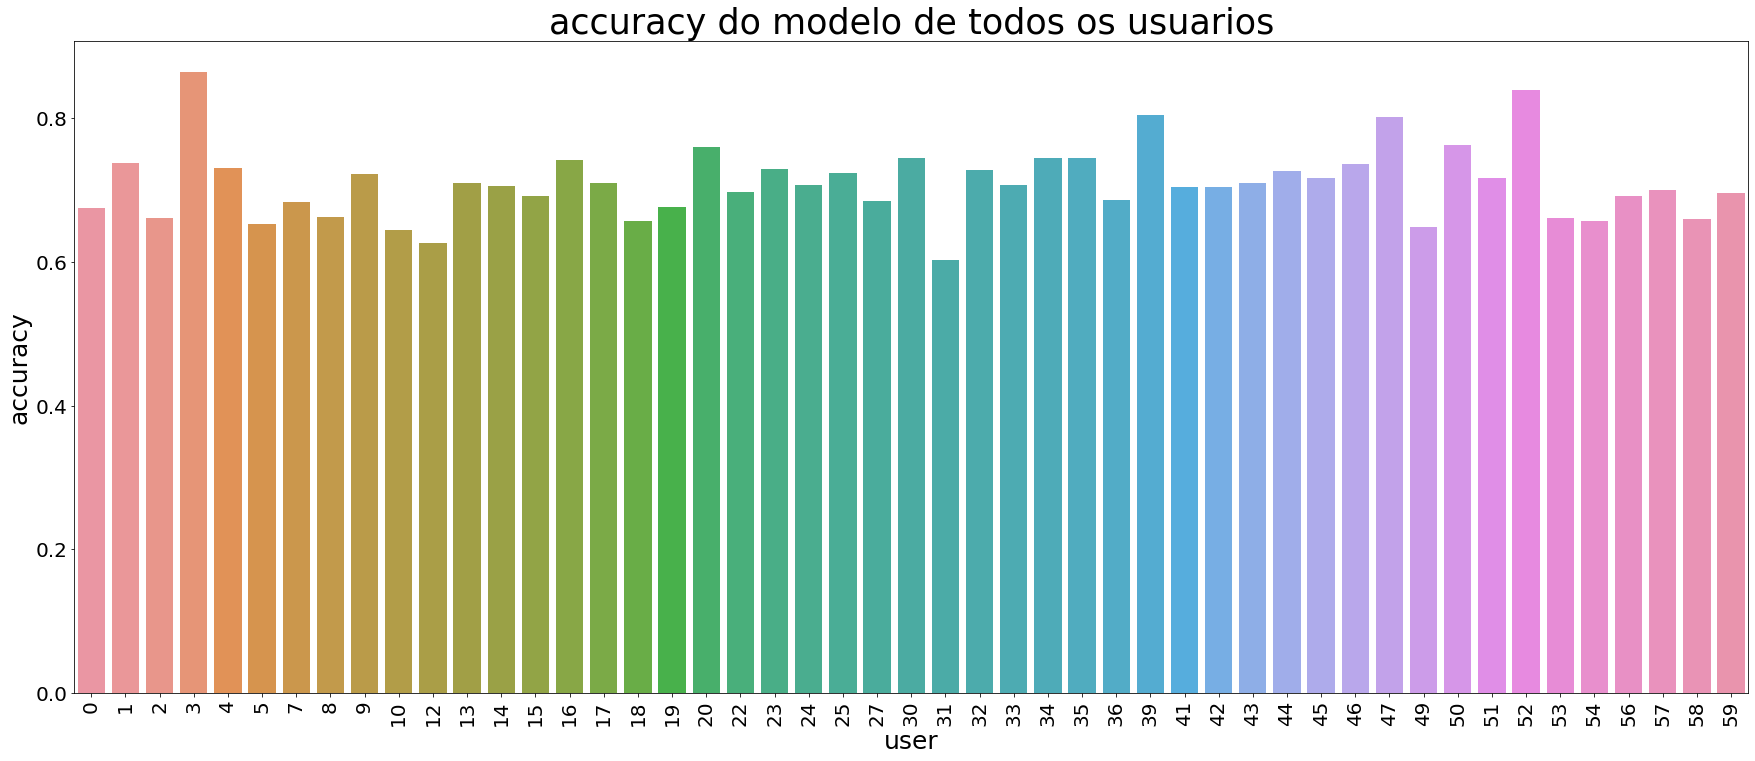

In [184]:

f, ax = plt.subplots(figsize=(30, 12))
plt.xticks(rotation='90')
sns.barplot(x=df_models['user'], y=df_models['accuracy'])
plt.xlabel('user', fontsize=25)
plt.ylabel('accuracy', fontsize=25)
plt.title('accuracy do modelo de todos os usuarios', fontsize=35)
plt.xticks(rotation='90',fontsize=20)
plt.yticks(fontsize=20)

### Obtem todas as informações de conversação do usuário 31

In [185]:
dataUser1=pd.read_sql_query(sql.format(31), conn) 
print(dataUser1)

      user  weekend  dayWeek  day  month  slot  conversation
0       31        0        3   27      3     0             0
1       31        0        3   27      3     1             0
2       31        0        3   27      3     2             0
3       31        0        3   27      3     3             0
4       31        0        3   27      3     4             0
...    ...      ...      ...  ...    ...   ...           ...
6043    31        0        4   30      5    91             0
6044    31        0        4   30      5    92             0
6045    31        0        4   30      5    93             0
6046    31        0        4   30      5    94             0
6047    31        0        4   30      5    95             0

[6048 rows x 7 columns]


In [186]:
dataUser1[(dataUser1.slot == 3) ]

,user,weekend,dayWeek,day,month,slot,conversation
3,31,0,3,27,3,3,0
99,31,0,4,28,3,3,1
195,31,0,5,29,3,3,1
291,31,1,6,30,3,3,0
387,31,1,0,31,3,3,0
483,31,1,0,1,4,3,0
579,31,0,2,2,4,3,1
675,31,0,3,3,4,3,1
771,31,0,3,4,4,3,1
867,31,0,4,5,4,3,0


In [187]:
dataTrain=dataTrain.append(dataUser1)

In [21]:
def datectDrift(data,classifier,detect):
    name=type(detect).__name__
    for index, row in data.iterrows():
        
        info=str(row['user'])+":" + str(row['month'])+ "/" +str(row['day']) +"-"+ str(row['slot'])+"  >"+name
        d=[row['weekend'],row['dayWeek'],row['day'],row['month'],row['slot']]  
        check=(classifier.predict([d])[0]==row['conversation'])
        detect.add_element(check)
        
        if detect.detected_warning_zone():
           print('        Warning zone has been detected in data: '+info)
        if detect.detected_change():
            print('Change has been detected in data:'+info)

In [189]:
def datectDriftAllAlgo(data,classifier):
    eddm = EDDM()
    eddm.FDDM_MIN_NUM_INSTANCES= (24*4)*7*2
    datectDrift(data,classifier,eddm)

    adwin = ADWIN()
    adwin.MAX_BUCKETS= 2
    datectDrift(data,classifier,adwin)

    ddm = DDM()
    datectDrift(data,classifier,ddm)

### Verifica o drift nos dados usando o metodo EDDM

In [191]:
eddm = EDDM()
eddm.FDDM_MIN_NUM_INSTANCES= (24*4)*7*2
datectDrift(dataTrain,classifier,eddm)

### Verifica o drift nos dados usando o metodo ADWIN

In [192]:
adwin = ADWIN()
adwin.MAX_BUCKETS= 2
datectDrift(dataTrain,classifier,adwin)

Change has been detected in data:59:4/26-63  >ADWIN
Change has been detected in data:31:4/15-31  >ADWIN
Change has been detected in data:31:4/15-63  >ADWIN


### Verifica o drift nos dados usando o metodo DDM

In [22]:
ddm = DDM()
datectDrift(dataTrain,classifier,ddm)

NameError: name 'classifier' is not defined

## Verifica o drift para cada usuario separando por slots de tempo

In [219]:
for i in range(0,60):
    dataUser=pd.read_sql_query(sql.format(i), conn) 
    if len(dataUser)<100:
        continue
    print("-------------------")
    print("%02d"%i)
    for slot in range(0,96):
        data=dataUser[(dataUser.slot == slot) ]
        model=df_models.at[i,'classifier']
        datectDriftAllAlgo(data,model)
    


-------------------
00
-------------------
01
-------------------
02
Change has been detected in data:2:5/19-47  >DDM
Change has been detected in data:2:5/23-48  >DDM
Change has been detected in data:2:5/10-50  >DDM
Change has been detected in data:2:5/23-52  >DDM
Change has been detected in data:2:5/22-56  >DDM
Change has been detected in data:2:5/16-57  >DDM
Change has been detected in data:2:5/10-58  >DDM
Change has been detected in data:2:5/28-59  >DDM
Change has been detected in data:2:5/28-64  >DDM
Change has been detected in data:2:5/16-66  >DDM
Change has been detected in data:2:5/16-67  >DDM
Change has been detected in data:2:5/4-71  >DDM
Change has been detected in data:2:5/7-72  >DDM
Change has been detected in data:2:5/22-73  >DDM
Change has been detected in data:2:5/10-74  >DDM
-------------------
03
-------------------
04
Change has been detected in data:4:5/18-85  >DDM
-------------------
05
Change has been detected in data:5:5/12-51  >DDM
Change has been detected in dat